In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('Assets\Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
#X = data.iloc[:,1].values 

X = data.iloc[:,1:2]
print(X)

   Level
0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10


In [4]:
y = data.iloc[:,-1]
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

In [5]:
from sklearn.linear_model import LinearRegression

#### Very small dataset no need to split directly pass to the algorithm.

In [6]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [7]:
lr.intercept_

-195333.33333333337

In [8]:
lr.coef_

array([80878.78787879])

In [9]:
lr.predict([[5]])

c:\Users\SHTLP_0060\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([209060.60606061])

In [10]:
y[5]

150000

### Still prediction is so incorrect let's see if it is a linear or Polynomial/non-linear problem

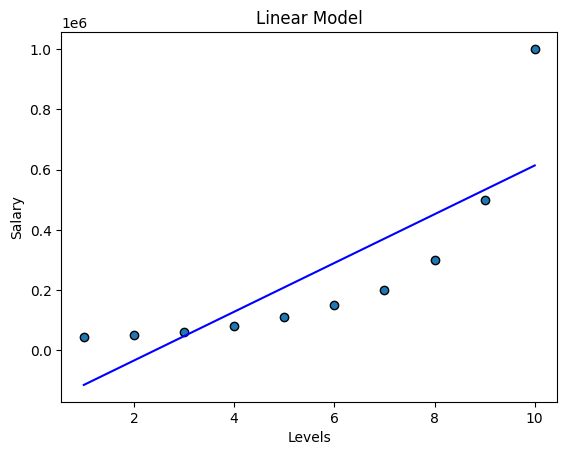

In [11]:
plt.scatter(X,y,edgecolors='Black')
plt.plot(X,lr.predict(X), color = "blue") 
plt.title('Linear Model')
plt.xlabel('Levels')
plt.ylabel('Salary')
plt.show()

#Proved it is a non-linear model as not able to draw a straight line.

In [12]:
from sklearn.preprocessing import PolynomialFeatures #Import polynomial

In [26]:
poly_reg = PolynomialFeatures(4)
X_poly = poly_reg.fit_transform(X)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [14]:
poly_reg.degree

4

In [15]:
poly_reg.fit(X_poly,y)

PolynomialFeatures(degree=4)

In [16]:
lr.fit(X_poly,y)

LinearRegression()

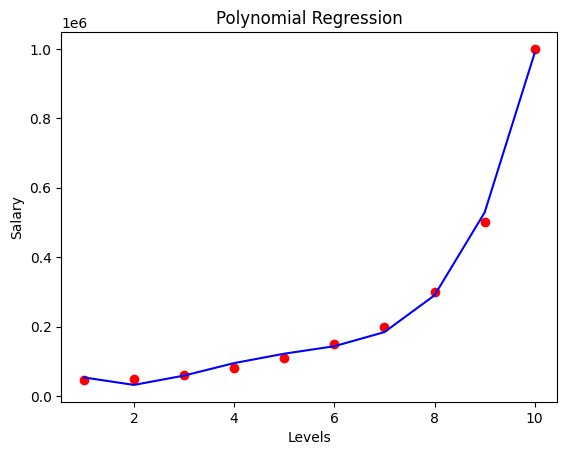

In [17]:
plt.scatter(X,y, color= 'red')
plt.plot(X,lr.predict(X_poly),color = 'blue')
plt.title("Polynomial Regression")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

In [20]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [22]:
lr.predict(poly_reg.fit_transform([[6]]))

array([143275.05827513])

In [23]:
from sklearn.metrics import r2_score

In [24]:
r2_score(y,lr.predict(X_poly))

0.9973922891706614